## Reglering av tanknivå med några enkla regulatorer

### Tank med P-regulator

En linjäriserad tankdynamik beskrivs av ett första ordningens system:


$$
  G(s) = \frac{1}{1+sT},
$$

där $T=10$. Med en P-regulator med förstärkningen $K_p>0$ fås det slutna systemet

$$
  G_y(s) = \frac{K_p G(s)}{1+K_p G(s)} = \frac{K_p}{1+sT+K_p} = \frac{K_p/(1+K_p)}{1+sT/(1+K_p)}
$$

och överföringsfunktionen från referensvärde till styrsignal blir

$$
  G_u(s) = \frac{K_p}{1+K_p G(s)} = \frac{K_p(1+sT)}{1+sT+K_p} = \frac{K_p(1+sT)/(1+K_p)}{1+sT/(1+K_p)}
$$

Vad händer med det slutna systemet då $K_p$ ökar?

#### Stegsvar och poler 

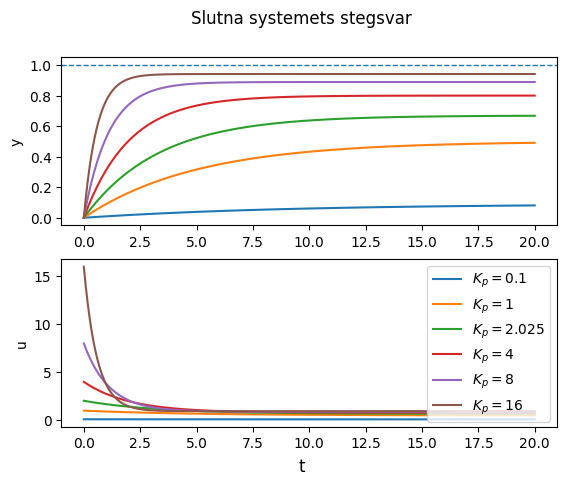

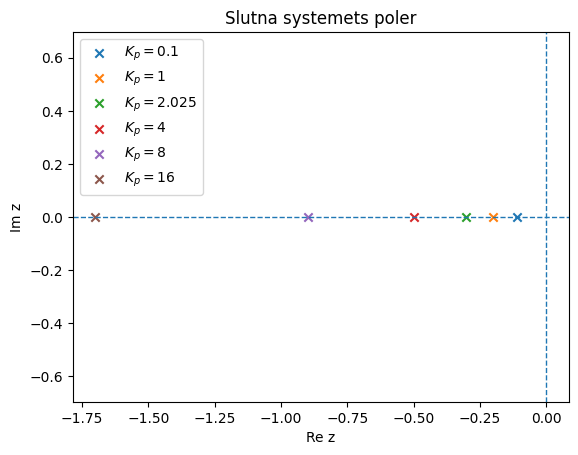

In [3]:
import control as ct
import matplotlib as mpl
import matplotlib.pyplot as plt

T = 10
Kp = [0.1, 1, 2.025, 4, 8, 16]

s = ct.tf('s')
Gy = [kp/(1+kp)/(1+s*T/(1+kp)) for kp in Kp]         # slutna systemets överföringsfunktion från r till y
Gu = [kp*(1+s*T)/(1+kp)/(1+s*T/(1+kp)) for kp in Kp] # d:o från r till u

fig, ax = plt.subplots(2, 1)
for i in range(len(Kp)):
    t, y = ct.step_response(Gy[i], 20)
    ax[0].plot(t, y)
    t, u = ct.step_response(Gu[i], 20)
    ax[1].plot(t, u)

fig.suptitle('Slutna systemets stegsvar')
fig.supxlabel('t')
plt.subplot(2, 1, 1)
plt.ylabel('y')
plt.axhline(1, linestyle='--', linewidth=1)
plt.subplot(2, 1, 2)
plt.ylabel('u')
plt.legend([f'$K_p=${Kp[i]}' for i in range(len(Kp))])
plt.show()

for i in range(len(Kp)):
    plt.scatter(-(1+Kp[i])/T, 0, marker='x')

plt.title('Slutna systemets poler')
plt.legend([f'$K_p=${Kp[i]}' for i in range(len(Kp))])
plt.xlabel('Re z')
plt.ylabel('Im z')
plt.axhline(0, linestyle='--', linewidth=1)
plt.axvline(0, linestyle='--', linewidth=1)
plt.axis('equal')
plt.show()


#### Observationer:

- Ökande $K_p$ ger snabbare respons och mindre kvarstående fel
- Ökande $K_p$ ger större styrsignaler löhöiuoiuäou
- Ökande $K_p$ ger poler längre till vänster i det komplexa talplanet

Slutsatsen är alltså att det är möjligt att åstadkomma ett återkopplat system med godtycklig snabbhet och godtyckligt litet kvarstående fel, så länge vi är beredda att "betala" med större styrsignaler. Delvis beror dessa slutsatser på den väldigt enkla, första ordningens, modell. Vi skall nu se vilka konsekvenserna blir av en något mer detaljerad modell. 

#### Pumpdynamik

I modellen ovan antas att tankens inflöde påverkas direkt av styrsignalen. En mer realistisk modell tar hänsyn till *pumpdynamiken* genom att inkludera en andra tidskonstant $\tau$, som är en storleksordning mindre än $T$:

$$
  G(s) = \frac{1}{(1+sT)(1+s\tau)},
$$

där $T=10$ som tidigare, och $\tau=1$. 

Det kan vara intressant att se vilken inverkan pumpdynamiken har på stegsvaret för det öppna systemet. Som framgår nedan har pumpdynamiken liten betydelse för tidsförloppet, förutom själva "starten".

In [ ]:
tau = 1
G1 = 1/(1+s*T)
G2 = 1/((1+s*T)*(1+s*tau))

t1, y1 = ct.step_response(G1, 20)
t2, y2 = ct.step_response(G2, 20)

plt.plot(t1, y1)
plt.plot(t2, y2)

plt.title('Stegsvar')
plt.xlabel('t')
plt.ylabel('y')
plt.legend(['Utan pumpdynamik', 'Med pumpdynamik'])
plt.show()

Med pumpdynamiken blir det slutna systemets överföringsfunktion från $r$ till $y$

$$
  G_y(s) = \frac{K_p G(s)}{1+K_p G(s)} = \frac{K_p}{(1+sT)(1+s\tau)+K_p} = \frac{K_p/(T\tau)}{s^2+(1/T+1/\tau)s+(1+K_p)/(T\tau)},
$$

och överföringsfunktionen från $r$ till $u$ blir

$$
  G_u(s) = \frac{K_p}{1+K_p G(s)} = \frac{K_p(1+sT)(1+s\tau)}{(1+sT)(1+s\tau)+K_p}.
$$

Låt oss se hur pumpdynamiken påverkar det slutna systemet när P-regulatorns förstärkning ökas!

In [ ]:
import control as ct
import matplotlib as mpl
import matplotlib.pyplot as plt
from numpy import real, imag

T = 10
tau = 1
Kp = [0.1 , 1, 2.025, 4, 8, 16]

s = ct.tf('s')
Gy = [kp/((1+s*T)*(1+s*tau)+kp) for kp in Kp]   # slutna systemets överföringsfunktion från r till y
Gu = [kp*(1+s*T)*(1+s*tau)/((1+s*T)*(1+s*tau)+kp) for kp in Kp]    # d:o från r till u

fig, ax = plt.subplots(2, 1)
for i in range(len(Kp)):
    t, y = ct.step_response(Gy[i], 20)
    ax[0].plot(t, y)
    t, u = ct.step_response(Gu[i], 20)
    ax[1].plot(t, u)

fig.suptitle('Slutna systemets stegsvar')
fig.supxlabel('t')
plt.subplot(2, 1, 1)
plt.ylabel('y')
plt.subplot(2, 1, 2)
plt.ylabel('u')
plt.legend([f'$K_p=${Kp[i]}' for i in range(len(Kp))], loc='upper right')
plt.show()

for i in range(len(Kp)):
    poles = Gy[i].poles()
    plt.scatter(real(poles), imag(poles), marker='x')

plt.title('Slutna systemets poler')
plt.axis('equal')
plt.legend([f'$K_p=${Kp[i]}' for i in range(len(Kp))])
plt.xlabel('Re z')
plt.ylabel('Im z')
plt.axhline(0, linestyle='--', linewidth=1)
plt.axvline(0, linestyle='--', linewidth=1)
plt.show()

#### Observationer:

- Ökande $K_p$ ger snabbare respons och mindre kvarstående fel, dvs samma som tidigare, men stegsvaret blir nu oscillativt för stora $K_p$
- Ökande $K_p$ ger större styrsignaler, dvs samma som tidigare, men även här märks ett oscillativt beteende 
- Förklaringen till det oscillativa beteendet syns i poldiagrammet: för större värden på $K_p$ fås komplexa poler med sämre dämpning ju större $K_p$ är

För större värden på $K_p$ fås alltså komplexa poler, och då kan vi använda följande approximationer, hämtade från Notebook *Stegsvar*:
\begin{align*}
      t_r &\propto \frac{1}{\omega_n} \\
      t_{5\%} &\approx \frac{3}{\zeta\omega_n} \\
      M &= e^{-\pi\zeta/\sqrt{1-\zeta^2}},
\end{align*}
Av detta framgår att ökande $K_p$ ger kortare stigtid $t_r$ men ungefär samma insvängningstid $t_{5\%}$, samt större översläng $M$.
 

Fenomenet att man får ett "svängigare" system, då förstärkningen i återkopplingen ökar, är vanligt. Vi kommer att få se många exempel på detta. 


### Tank med I-regulator

För att eliminera det kvarstående felet skall vi nu använda en I-regulator $F(s)$ för att reglera tanken:

$$
  F(s) = \frac{K_i}{s},
$$

Detta ger det slutna systemet

$$
  G_y(s) = \frac{F(s)G(s)}{1+F(s)G(s)} = \frac{K_i}{s(1+sT)+K_i} = \frac{K_i/T}{s^2+s/T+K_i/T}
$$

och överföringsfunktionen från referensvärde till styrsignal blir

$$
  G_u(s) = \frac{F(s)}{1+F(s)G(s)} = \frac{K_i(1+sT)}{s(1+sT)+K_i}
$$

Vad händer med det slutna systemet då $K_i$ ökar?

In [ ]:
import control as ct
import matplotlib as mpl
import matplotlib.pyplot as plt

T = 10
Ki = [0.01, 0.025, 0.04, 0.08, 0.16, 0.32]

s = ct.tf('s')
Gy = [ki/(s*(1+s*T)+ki) for ki in Ki]         # slutna systemets överföringsfunktion från r till y
Gu = [ki*(1+s*T)/(s*(1+s*T)+ki) for ki in Ki] # d:o från r till u

fig, ax = plt.subplots(2, 1)
for i in range(len(Ki)):
    t, y = ct.step_response(Gy[i], 60)
    ax[0].plot(t, y)
    t, u = ct.step_response(Gu[i], 60)
    ax[1].plot(t, u)

fig.suptitle('Slutna systemets stegsvar')
fig.supxlabel('t')
plt.subplot(2, 1, 1)
plt.ylabel('y')
plt.subplot(2, 1, 2)
plt.ylabel('u')
plt.legend([f'$K_i=${Ki[i]}' for i in range(len(Ki))])
plt.show()

for i in range(len(Ki)):
    poles = Gy[i].poles()
    plt.scatter(real(poles), imag(poles), marker='x')

plt.title('Slutna systemets poler')
plt.legend([f'$K_i=${Ki[i]}' for i in range(len(Ki))])
plt.xlabel('Re z')
plt.ylabel('Im z')
plt.axhline(0, linestyle='--', linewidth=1)
plt.axvline(0, linestyle='--', linewidth=1)
plt.axis('equal')
plt.show()

#### Observationer:

* Slutna systemet är av ordning 2 och med ökande $K_i$ fås så småningom komplexa poler
* Ökande $K_i$ ger kortare stigtider men sämre dämpning och ungefär samma insvängningstid
* Val av $K_i$ handlar väsentligen om att acceptera ett långsamt eller svängigt slutet system

#### Pumpdynamik

Med pumpdynamiken inkluderad i modellen blir nu det slutna systemets överföringsfunktion från $r$ till $y$

$$
  G_y(s) = \frac{F(s)G(s)}{1+F(s)G(s)} = \frac{K_i}{s(1+sT)(1+s\tau)+K_i},
$$

och överföringsfunktionen från $r$ till $u$ blir

$$
  G_u(s) = \frac{F(s)}{1+F(s)G(s)} = \frac{K_i(1+sT)(1+s\tau)}{s(1+sT)(1+s\tau)+K_i}
$$

In [ ]:
import control as ct
import matplotlib as mpl
import matplotlib.pyplot as plt

T = 10
tau = 1
Ki = [0.01, 0.025, 0.04, 0.08, 0.16, 0.32]

s = ct.tf('s')
Gy = [ki/(s*(1+s*T)*(1+s*tau)+ki) for ki in Ki]         # slutna systemets överföringsfunktion från r till y
Gu = [ki*(1+s*T)*(1+s*tau)/(s*(1+s*T)*(1+s*tau)+ki) for ki in Ki] # d:o från r till u

fig, ax = plt.subplots(2, 1)
for i in range(len(Ki)):
    t, y = ct.step_response(Gy[i], 60)
    ax[0].plot(t, y)
    t, u = ct.step_response(Gu[i], 60)
    ax[1].plot(t, u)

fig.suptitle('Slutna systemets stegsvar')
fig.supxlabel('t')
plt.subplot(2, 1, 1)
plt.ylabel('y')
plt.subplot(2, 1, 2)
plt.ylabel('u')
plt.legend([f'$K_i=${Ki[i]}' for i in range(len(Ki))])
plt.show()

for i in range(len(Ki)):
    poles = Gy[i].poles()
    plt.scatter(real(poles), imag(poles), marker='x')

plt.title('Slutna systemets poler')
plt.legend([f'$K_i=${Ki[i]}' for i in range(len(Ki))])
plt.xlabel('Re z')
plt.ylabel('Im z')
plt.axhline(0, linestyle='--', linewidth=1)
plt.axvline(0, linestyle='--', linewidth=1)
plt.axis('equal')
plt.show()

#### Observationer:

* Beteendet för ökande värden på $K_i$ påminner mycket om fallet utan pumpdynamik
* En skillnad som anas i poldiagrammet är att slutna systemet, som nu är av ordning 3, får ett komplext polpar allt närmare imaginäraxeln . För ännu högre värden på $K_i$ fås faktiskt ett instabilt slutet system. Verifiera gärna med simulering och användning av Routh-Hurwitz stabilitetstest (se Exempel 14 i föreläsningsanteckningarna)!

### Tank med PI-regulator

Slutligen prövar vi att reglera tanken med en PI-regulator

$$
  F(s) = K_p(1+\frac{1}{sT_i}),
$$

som ger det slutna systemet

$$
  G_y(s) = \frac{F(s)G(s)}{1+F(s)G(s)} = \frac{K_pK(1+sT_i)/(TT_i)}{s^2+s(1+K_pK)/T+K_pK/(TT_i)}
$$

och överföringsfunktionen från referensvärde till styrsignal blir

$$
  G_u(s) = \frac{F(s)}{1+F(s)G(s)} = \frac{K_p(1+sT_i)(1+sT)/(TT_i)}{s^2+s(1+K_pK)/T+K_pK/(TT_i)}
$$

Nu har vi två regulatorparametrar att variera, så att polerna kan väljas med ganska stor frihet. Notera dock att PI-regulatorn nu också ger ett nollställe i det slutna systemets överföringsfunktioner!

Vi undersöker det slutna systemets beteende för några olika parametervärden (prova gärna andra kombinationer!):

In [ ]:
import control as ct
import matplotlib as mpl
import matplotlib.pyplot as plt

s = ct.tf('s')
T = 10
K = 1
G = K/(1+T*s)

Kp = [1, 3, 5, 1, 1]
N = range(len(Kp))
Ti = [5, 5, 5, 3, 1]
F = [Kp[i]*(1+Ti[i]*s)/(Ti[i]*s) for i in N]

Gy = [ct.feedback(F[i]*G,1) for i in N]
Gu = [ct.feedback(F[i],G) for i in N]

fig, ax = plt.subplots(2, 1)
for i in N:
    t, y = ct.step_response(Gy[i], 60)
    ax[0].plot(t, y)
    t, u = ct.step_response(Gu[i], 60)
    ax[1].plot(t, u)

fig.suptitle('Slutna systemets stegsvar')
fig.supxlabel('t')
plt.subplot(2, 1, 1)
plt.ylabel('y')
plt.subplot(2, 1, 2)
plt.ylabel('u')
plt.legend([f'$K_p=${Kp[i]}, $T_i=${Ti[i]}' for i in N])
plt.show()

fig, ax = plt.subplots()
for i in N:
    poles = Gy[i].poles()
    plt.scatter(real(poles), imag(poles), marker='x')

ax.axis('equal')
plt.title('Slutna systemets poler')
plt.legend([f'$K_p=${Kp[i]}, $T_i=${Ti[i]}' for i in N])
plt.xlabel('Re z')
plt.ylabel('Im z')
plt.axhline(0, linestyle='--', linewidth=1)
plt.axvline(0, linestyle='--', linewidth=1)
plt.show()

fig, ax = plt.subplots()
for i in N:
    zeros = Gy[i].zeros()
    plt.scatter(real(zeros), imag(zeros), marker='o')

ax.axis('equal')
plt.title('Slutna systemets nollställen')
plt.legend([f'$K_p=${Kp[i]}, $T_i=${Ti[i]}' for i in N])
plt.xlabel('Re z')
plt.ylabel('Im z')
plt.axhline(0, linestyle='--', linewidth=1)
plt.axvline(0, linestyle='--', linewidth=1)
plt.show()

#### Observationer:

* Ökande $K_p$ ger poler med större avstånd från origo, och detta ges i sin tur av $\omega_n$ (antaget komplexa poler). Vi får alltså kortare stigtider, medan dämpningen påverkas rätt lite.
* Minskande $T_i$ ger större integralverkan. Detta leder till oförändrad realdel och större imaginärdel för polerna, vilket betyder ganska oförändrad insvängningstid men sämre dämpning. 